In [1]:
.libPaths("/home/tbellagio/miniforge3/envs/r-environment/lib/R/library")

In [2]:
library(lme4)

Warning message:
“package ‘lme4’ was built under R version 4.3.3”
Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.3.2”


In [12]:
df <- read.csv("df.csv")

In [36]:
omega <- read.csv("omega.csv",header = FALSE)

In [14]:
omega

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
70.08286,67.69639,68.61549,68.84964,67.70668,68.93408,67.78405,68.50537,68.49508,68.62551,⋯,68.09013,69.48703,68.85783,71.10883,72.25057,67.75439,68.86407,69.41535,68.74799,67.57122
67.69639,66.99431,67.13532,67.32425,66.51624,67.47368,66.61574,67.08633,67.00578,67.29061,⋯,66.73229,68.08669,66.85194,68.84749,69.77633,66.39082,67.46655,68.03382,67.00744,66.51939
68.61549,67.13532,68.46922,68.07392,67.01517,68.16615,67.20185,67.81132,67.83521,67.84860,⋯,67.53229,68.70897,67.86523,69.75824,71.03305,67.24552,68.49011,68.41849,67.71366,66.83729
68.84964,67.32425,68.07392,68.90092,67.31575,68.37661,67.35940,68.20012,68.21396,68.27573,⋯,67.83067,69.61655,68.38042,70.37628,70.93562,67.54448,68.60839,69.22974,68.59581,67.26939
67.70668,66.51624,67.01517,67.31575,67.47229,67.48463,66.78432,67.38047,67.15332,67.44162,⋯,67.47745,67.84252,68.10237,69.29383,69.48649,66.72963,67.97185,68.66184,67.49397,67.15041
68.93408,67.47368,68.16615,68.37661,67.48463,69.23001,67.50800,68.27080,68.16794,68.33518,⋯,67.83232,69.24062,68.72676,70.49623,71.23085,67.77864,68.55906,69.24057,68.55365,67.56461
67.78405,66.61574,67.20185,67.35940,66.78432,67.50800,67.26821,67.31258,67.09773,67.64699,⋯,67.78729,67.98099,67.43299,69.17692,70.10269,66.82811,68.12687,68.50052,67.74196,66.73759
68.50537,67.08633,67.81132,68.20012,67.38047,68.27080,67.31258,69.00130,68.03561,68.07951,⋯,68.23062,68.67893,69.07966,70.38797,70.73158,67.62370,68.40833,69.51941,69.56909,68.20113
68.49508,67.00578,67.83521,68.21396,67.15332,68.16794,67.09773,68.03561,68.44542,67.95848,⋯,67.56103,69.09939,67.95259,70.01983,70.61962,67.53337,68.17867,68.82816,68.50740,67.34821


In [15]:
df$total <- df$successes + df$failures  # Total number of trials

In [16]:
# Fit the GLMM model
glmm_model <- glmer(cbind(successes, failures) ~ env_variable + (1 | pop), 
                    data = df, family = binomial)

In [17]:
library(MCMCglmm)

In [30]:
dim(omega)

[1] 326 326

In [26]:
num_pop <- length(unique(df$pop))


In [42]:
length(unique(df$pop))

[1] 326

In [27]:
omega_subset <- omega[1:num_pop, 1:num_pop]


In [29]:
dim(omega_subset)

[1] 326 326

In [34]:
G = list(G1 = list(V = diag(1), nu = 3))


In [37]:
cov_matrix <- omega  # Replace with your matrix


In [51]:
cov_matrix <- as.matrix(cov_matrix)

In [44]:
rownames(cov_matrix) <- colnames(cov_matrix) <- unique(df$pop)

In [64]:
rownames(omega) <- colnames(omega) <- unique(df$pop)

In [65]:
omega_matrix = as.matrix(omega) 

In [69]:
omega_matrix = Matrix(omega_matrix, sparse = TRUE)

In [70]:
# Convert the covariance matrix to the format that MCMCglmm expects
G_structure <- list(G1 = list(V = cov_matrix, n = 1))

# Fit the model using the updated random effect structure
glmm_model2 <- MCMCglmm(cbind(successes, failures) ~ env_variable, 
                       random = ~ pop,  # Random effect: population
                       ginverse = list(pop = omega_matrix),  # Incorporate population structure
                       family = "multinomial2",  # Binomial family for successes/failures
                       data = df, 
                       prior = prior, 
                       verbose = FALSE)  # Disable verbose output

In [120]:
cov_matrix

,0,1,2,3,4,5,6,7,8,9,⋯,316,317,318,319,320,321,322,323,324,325
0,70.08286,67.69639,68.61549,68.84964,67.70668,68.93408,67.78405,68.50537,68.49508,68.62551,⋯,68.09013,69.48703,68.85783,71.10883,72.25057,67.75439,68.86407,69.41535,68.74799,67.57122
1,67.69639,66.99431,67.13532,67.32425,66.51624,67.47368,66.61574,67.08633,67.00578,67.29061,⋯,66.73229,68.08669,66.85194,68.84749,69.77633,66.39082,67.46655,68.03382,67.00744,66.51939
2,68.61549,67.13532,68.46922,68.07392,67.01517,68.16615,67.20185,67.81132,67.83521,67.84860,⋯,67.53229,68.70897,67.86523,69.75824,71.03305,67.24552,68.49011,68.41849,67.71366,66.83729
3,68.84964,67.32425,68.07392,68.90092,67.31575,68.37661,67.35940,68.20012,68.21396,68.27573,⋯,67.83067,69.61655,68.38042,70.37628,70.93562,67.54448,68.60839,69.22974,68.59581,67.26939
4,67.70668,66.51624,67.01517,67.31575,67.47229,67.48463,66.78432,67.38047,67.15332,67.44162,⋯,67.47745,67.84252,68.10237,69.29383,69.48649,66.72963,67.97185,68.66184,67.49397,67.15041
5,68.93408,67.47368,68.16615,68.37661,67.48463,69.23001,67.50800,68.27080,68.16794,68.33518,⋯,67.83232,69.24062,68.72676,70.49623,71.23085,67.77864,68.55906,69.24057,68.55365,67.56461
6,67.78405,66.61574,67.20185,67.35940,66.78432,67.50800,67.26821,67.31258,67.09773,67.64699,⋯,67.78729,67.98099,67.43299,69.17692,70.10269,66.82811,68.12687,68.50052,67.74196,66.73759
7,68.50537,67.08633,67.81132,68.20012,67.38047,68.27080,67.31258,69.00130,68.03561,68.07951,⋯,68.23062,68.67893,69.07966,70.38797,70.73158,67.62370,68.40833,69.51941,69.56909,68.20113
8,68.49508,67.00578,67.83521,68.21396,67.15332,68.16794,67.09773,68.03561,68.44542,67.95848,⋯,67.56103,69.09939,67.95259,70.01983,70.61962,67.53337,68.17867,68.82816,68.50740,67.34821
9,68.62551,67.29061,67.84860,68.27573,67.44162,68.33518,67.64699,68.07951,67.95848,68.94734,⋯,68.70165,69.90683,68.72666,70.23093,70.71477,67.43824,68.51978,69.52393,68.79920,67.24828


In [119]:
df

X,pop,successes,failures,env_variable,total
<int>,<int>,<int>,<int>,<dbl>,<int>
0,0,89,203,-0.7953475,292
1,1,114,356,-0.7953475,470
2,2,124,334,-0.7953475,458
3,3,122,344,-0.7953475,466
4,4,159,293,-0.7953475,452
5,5,121,285,-0.7953475,406
6,6,143,365,-0.7953475,508
7,7,82,220,-0.7953475,302
8,8,112,318,-0.7953475,430


In [ ]:
# Load the Matrix package
library(Matrix)

# Ensure that cov_matrix is positive definite and invertible
# Convert to a sparse matrix format
cov_matrix_sparse <- Matrix(cov_matrix, sparse = TRUE)

# Invert the matrix
cov_matrix_inverse <- solve(cov_matrix_sparse)

In [56]:

# Fit the model using the updated random effect structure
glmm_model <- MCMCglmm(cbind(successes, failures) ~ env_variable, 
                       random = ~ pop,  # Random effect: population
                       ginverse = list(pop = cov_matrix_inverse),  # Incorporate population structure
                       family = "multinomial2",  # Binomial family for successes/failures
                       data = df, 
                       prior = prior, 
                       verbose = FALSE)  # Disable verbose output


 Iterations = 3001:12991
 Thinning interval  = 10
 Sample size  = 1000 

 DIC: 81796.95 

 G-structure:  ~pop

    post.mean l-95% CI u-95% CI eff.samp
pop    0.0587  0.04483  0.07358    57.56

 R-structure:  ~units

      post.mean  l-95% CI u-95% CI eff.samp
units 0.0006473 0.0001835 0.001348    120.2

 Location effects: cbind(successes, failures) ~ env_variable 

             post.mean l-95% CI u-95% CI eff.samp pMCMC
(Intercept)   -1.58242 -5.38873  1.80243   233.38  0.38
env_variable  -0.02462 -0.07935  0.01739    24.61  0.28

In [101]:
glmm_model

  [[ suppressing 33 column names ‘pop.0’, ‘pop.1’, ‘pop.2’ ... ]]

  [[ suppressing 33 column names ‘units.1’, ‘units.2’, ‘units.3’ ... ]]

  [[ suppressing 33 column names ‘0’, ‘1’, ‘2’ ... ]]



$Sol
Markov Chain Monte Carlo (MCMC) output:
Start = 3001 
End = 12991 
Thinning interval = 10 
         (Intercept)  env_variable
   [1,] -3.762761122 -5.177836e-03
   [2,] -6.454576721 -1.110912e-02
   [3,] -1.948736243 -2.002059e-02
   [4,] -4.437378398 -1.511751e-02
   [5,] -0.966566300 -7.318282e-03
   [6,] -3.022118171 -2.159561e-03
   [7,] -3.985356233 -3.066630e-02
   [8,] -0.887469377 -1.799022e-02
   [9,] -2.367334393 -3.565452e-02
  [10,] -2.872080953 -4.014271e-02
  [11,] -0.772453604 -3.354923e-02
  [12,] -0.823965358 -2.753014e-02
  [13,] -4.112190459 -2.933769e-02
  [14,] -1.404438117 -4.727648e-02
  [15,] -0.074524246 -4.885067e-02
  [16,] -3.498835234 -2.457223e-02
  [17,] -3.042434568 -2.845124e-02
  [18,] -2.104946815 -1.817195e-02
  [19,] -2.212895614 -1.026952e-02
  [20,] -4.625044530 -2.494592e-02
  [21,] -5.065259638 -3.360812e-02
  [22,]  0.565186265 -2.017451e-02
  [23,] -0.382794606 -1.116030e-02
  [24,] -4.324421333 -2.573531e-03
  [25,] -2.610253167 -2.77452

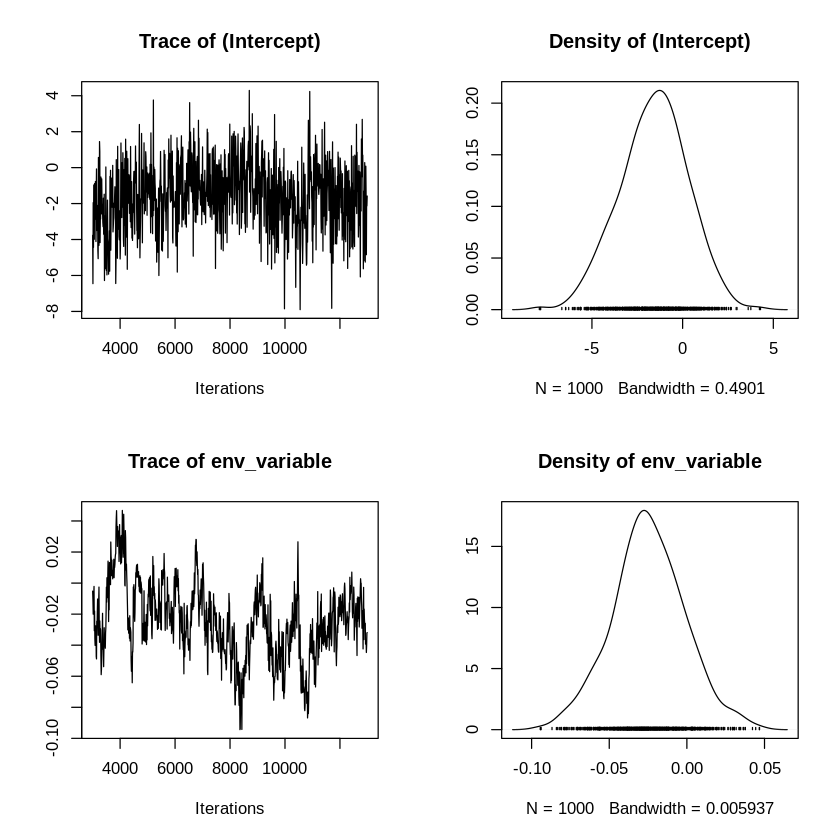

In [71]:
# Trace and density plots for fixed effects
plot(glmm_model$Sol)  # 'Sol' stores the posterior samples for fixed effects



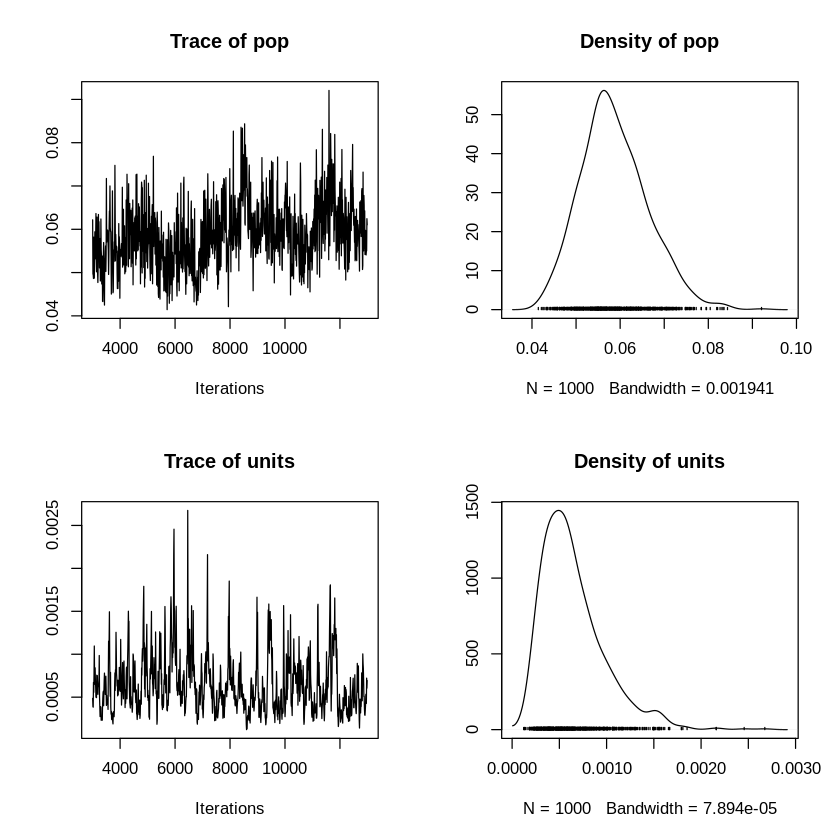

In [72]:
# Trace and density plots for random effects
plot(glmm_model$VCV) 

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”


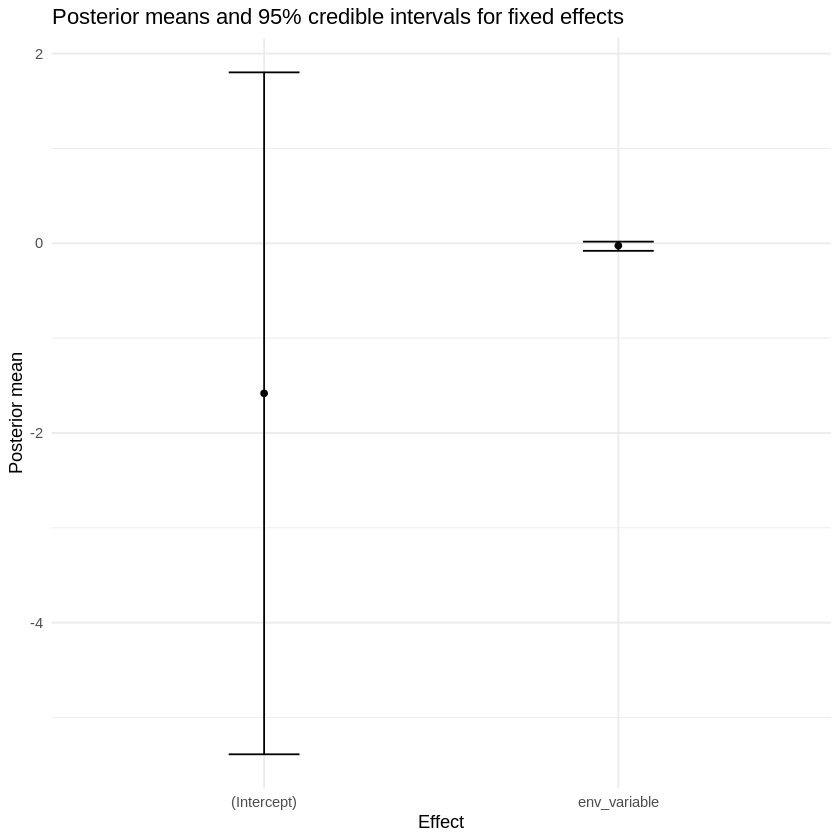

In [73]:
# Extract posterior means and 95% credible intervals for fixed effects
posterior_means <- apply(glmm_model$Sol, 2, mean)
credible_intervals <- HPDinterval(glmm_model$Sol, prob = 0.95)

# Create a data frame for easy plotting
plot_data <- data.frame(
  Effect = colnames(glmm_model$Sol),
  Mean = posterior_means,
  Lower = credible_intervals[,1],
  Upper = credible_intervals[,2]
)

# Plot the effects with credible intervals
library(ggplot2)
ggplot(plot_data, aes(x = Effect, y = Mean)) +
  geom_point() +
  geom_errorbar(aes(ymin = Lower, ymax = Upper), width = 0.2) +
  theme_minimal() +
  labs(title = "Posterior means and 95% credible intervals for fixed effects",
       y = "Posterior mean", x = "Effect")


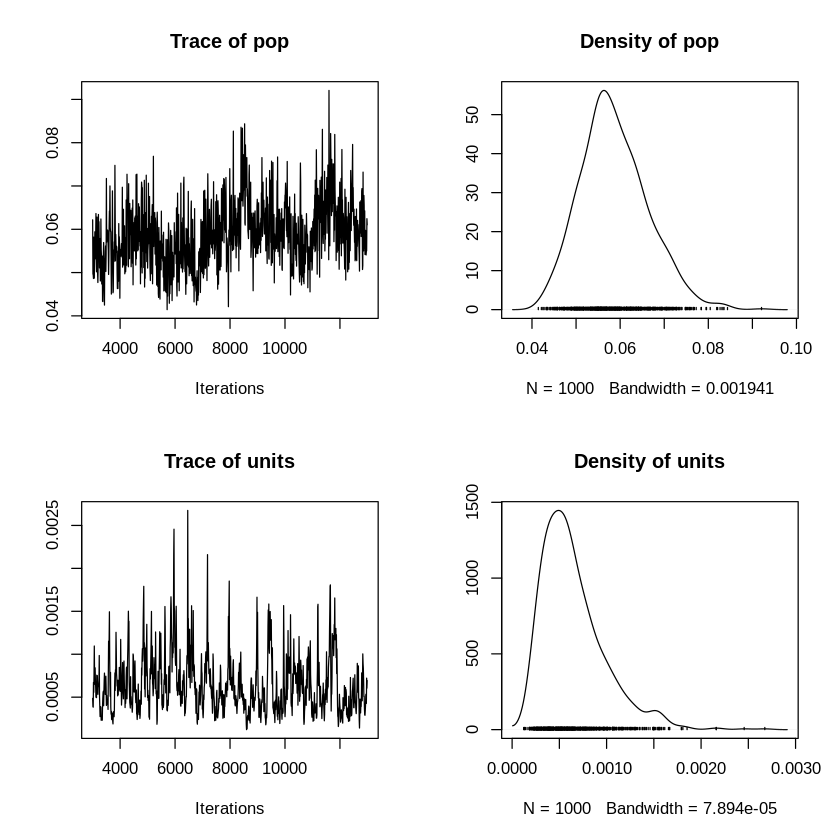

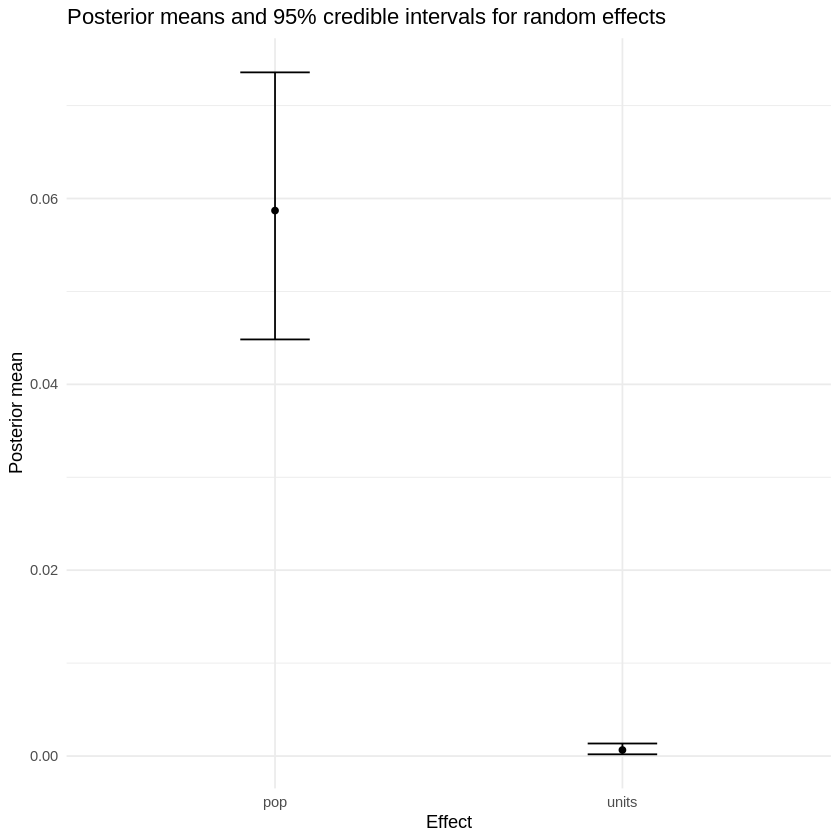

In [74]:
# Plot the random effect variances and covariances
plot(glmm_model$VCV)

# Extract posterior means and credible intervals for random effects
random_effect_means <- apply(glmm_model$VCV, 2, mean)
credible_intervals_random <- HPDinterval(glmm_model$VCV, prob = 0.95)

# If needed, plot random effects similarly as for fixed effects
random_effect_plot_data <- data.frame(
  Effect = colnames(glmm_model$VCV),
  Mean = random_effect_means,
  Lower = credible_intervals_random[,1],
  Upper = credible_intervals_random[,2]
)

# Plot random effects with credible intervals
ggplot(random_effect_plot_data, aes(x = Effect, y = Mean)) +
  geom_point() +
  geom_errorbar(aes(ymin = Lower, ymax = Upper), width = 0.2) +
  theme_minimal() +
  labs(title = "Posterior means and 95% credible intervals for random effects",
       y = "Posterior mean", x = "Effect")


In [102]:
posterior_samples <- glmm_model2$Sol

In [108]:
# Extract posterior samples for all fixed effects (including SNPs)
posterior_samples <- glmm_model2$Sol

In [117]:
env_snp_cols <- grep("your_env_variable_name", colnames(glmm_model2$Sol), value = TRUE)

# Extract the posterior samples only for the environmental SNP effects
env_snp_samples <- glmm_model2$Sol[, env_snp_cols]

In [118]:
env_snp_samples

Warning message in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


[1,]
 [2,]
 [3,]
 [4,]
 [5,]
 [6,]
 [7,]
 [8,]
 [9,]
[10,]
[11,]
[12,]
[13,]
[14,]
[15,]
[16,]
[17,]
[18,]
[19,]
[20,]
[21,]
[22,]
[23,]
[24,]
[25,]
[26,]
[27,]
[28,]
[29,]
[30,]
[31,]
[32,]
[33,]
[34,]
[35,]
[36,]
[37,]
[38,]
[39,]
[40,]
[41,]
[42,]
[43,]
[44,]
[45,]
[46,]
[47,]
[48,]
[49,]
[50,]
[51,]
[52,]
[53,]
[54,]
[55,]
[56,]
[57,]
[58,]
[59,]
[60,]
[61,]

In [109]:
# Extract posterior samples for all fixed effects (including SNPs)
posterior_samples <- glmm_model2$Sol

# View the first few rows to inspect what effects are included
env_snp_cols <- grep("env_variable", colnames(posterior_samples), value = TRUE)

In [110]:
env_snp_cols

[1] "env_variable"

In [111]:
env_snp_samples <- posterior_samples[, env_snp_cols]


In [112]:
# Calculate 95% credible intervals for the environmental SNP effects
credible_intervals <- HPDinterval(env_snp_samples, prob = 0.95)

# View the credible intervals
credible_intervals


,lower,upper
var1,-0.05654185,0.07685135


In [113]:
# Find which environmental SNPs have credible intervals that do not include zero
significant_snps <- which(credible_intervals[, 1] > 0 | credible_intervals[, 2] < 0)

# Get the names of the significant SNPs
significant_snp_names <- colnames(env_snp_samples)[significant_snps]


In [114]:
significant_snp_names

NULL

In [100]:
credible_intervals[, 1]

[1] -0.07935416

In [91]:
credible_intervals[,2]

(Intercept) env_variable 
    1.802425     0.017388

In [78]:
# Find which SNPs have credible intervals that do not include zero
significant_snps <- which(credible_intervals[,1] > 0 | credible_intervals[,2] < 0)

# Get the names of the significant SNPs
snp_names <- colnames(posterior_samples)[significant_snps]

character(0)

In [81]:
which(credible_intervals[,1] > 0 | credible_intervals[,2] < 0)

named integer(0)

In [82]:
credible_intervals

,lower,upper
(Intercept),-5.38872649,1.802425
env_variable,-0.07935416,0.017388


In [19]:
# Define the prior using the Omega matrix
prior <- list(R = list(V = diag(1), nu = 0.002),  # Residual variance
              G = list(G1 = list(V = omega, nu = 2)))  # Omega matrix for population structure

# Fit the model using family = "multinomial2" for binomial data (successes and failures)
glmm_model <- MCMCglmm(cbind(successes, failures) ~ env_variable, 
                       random = ~ pop,  # Random effect: population
                       family = "multinomial2",  # Binomial family for successes/failures
                       data = df, 
                       prior = prior, 
                       verbose = FALSE)  # Disable verbose output

# Check model summary
summary(glmm_model)



ERROR: Error in priorformat(if (NOpriorG) {: V is the wrong dimension for some prior$G/prior$R elements


In [21]:
length(unique(df$pop))

[1] 326

In [22]:
dim(omega)

[1] 326 326